<a href="https://colab.research.google.com/github/aiml460/460-AD/blob/main/ad_newspaper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
data = pd.read_csv(r"/content/NewspaperData.csv")
data.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 948.0+ bytes


In [ ]:
data.sample(10)

,Newspaper,daily,sunday
10,Houston Chronicle,449.755,620.752
27,Rocky Mountain News,374.009,432.502
24,Portland Oregonian,337.672,440.923
33,Washington Post,838.902,1165.567
26,Rochester Democrat & Chronicle,133.239,262.048
2,Boston Herald,355.628,235.084
4,Chicago Sun Times,537.780,559.093
11,Kansas City Star,288.571,423.305
30,St. Louis Post-Dispatch,391.286,585.681
9,Hartford Courant,231.177,323.084


In [ ]:
data.drop('Newspaper',axis=1).corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


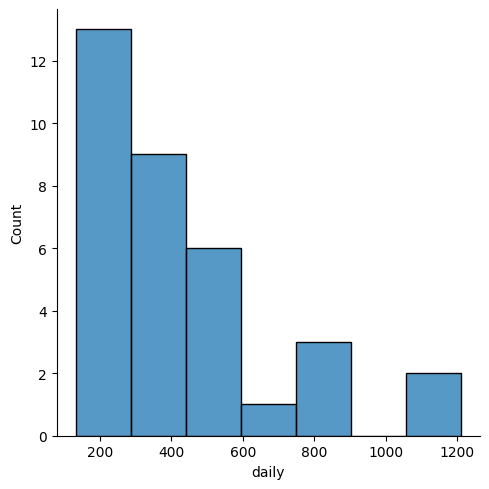

In [ ]:
import seaborn as sns
sns.displot(data['daily'])

In [ ]:
data.drop('Newspaper',axis=1).corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


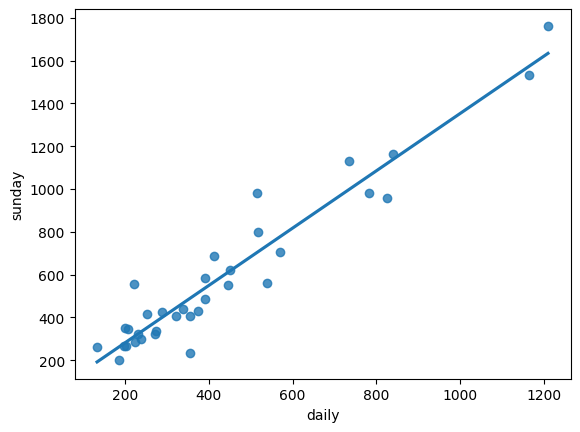

In [ ]:
import statsmodels.formula.api as smf
model = smf.ols("sunday~daily",data = data).fit()
sns.regplot(x="daily", y="sunday", data=data,ci=None);

In [ ]:
data.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


In [ ]:
model.params

,0
Intercept,13.835630
daily,1.339715


In [ ]:
print(model.tvalues, '/n', model.pvalues)

Intercept     0.386427
daily        18.934840
dtype: float64 /n Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64


In [ ]:
(model.rsquared,model.rsquared_adj)

(0.9180596895873295, 0.9154990548869336)

In [ ]:
daily=1000

In [ ]:
sunday=1.339715*daily+13.835630
sunday

1353.55063

In [ ]:
sunday+108

1461.55063

In [ ]:
newdata=pd.Series([1000,3000,500,1500,4000])
newdata

,0
0,1000
1,3000
2,500
3,1500
4,4000


In [ ]:
data_pred=pd.DataFrame(newdata,columns=['daily'])
data_pred

,daily
0,1000
1,3000
2,500
3,1500
4,4000


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
data.head(3)

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084


In [ ]:
lr=LinearRegression()
lr.fit(data[['daily']],data['sunday'])

LinearRegression()

In [ ]:
type(data[['daily']])

pandas.core.frame.DataFrame

In [ ]:
lr.predict(data_pred)

array([1353.55038759, 4032.97990296,  683.69300875, 2023.40776644,
       5372.69466065])